In [1]:
# ============================================
# K-Nearest Neighbours Classification - Zoo Dataset
# ============================================

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

# =========================
# 1. Load and Explore Data
# =========================
df = pd.read_csv("C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\KNN\\KNN\\Zoo.csv")

print("First 5 rows of dataset:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())


First 5 rows of dataset:
   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3 

C:\Users\Sindu\AppData\Local\Temp\ipykernel_9428\4248208557.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="viridis")


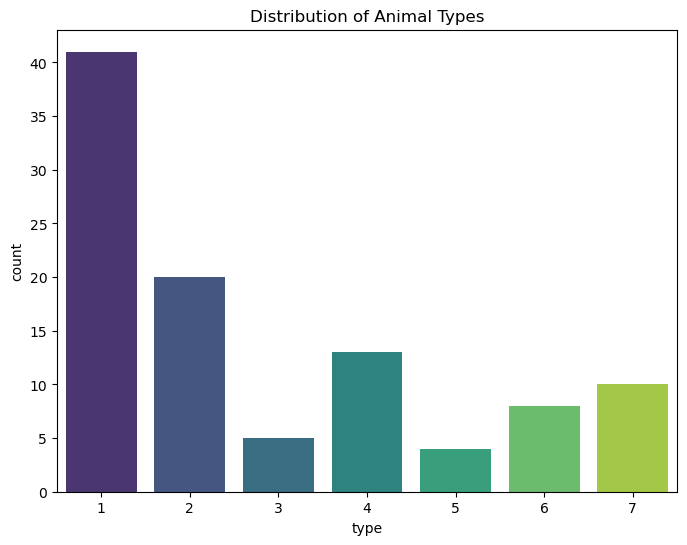

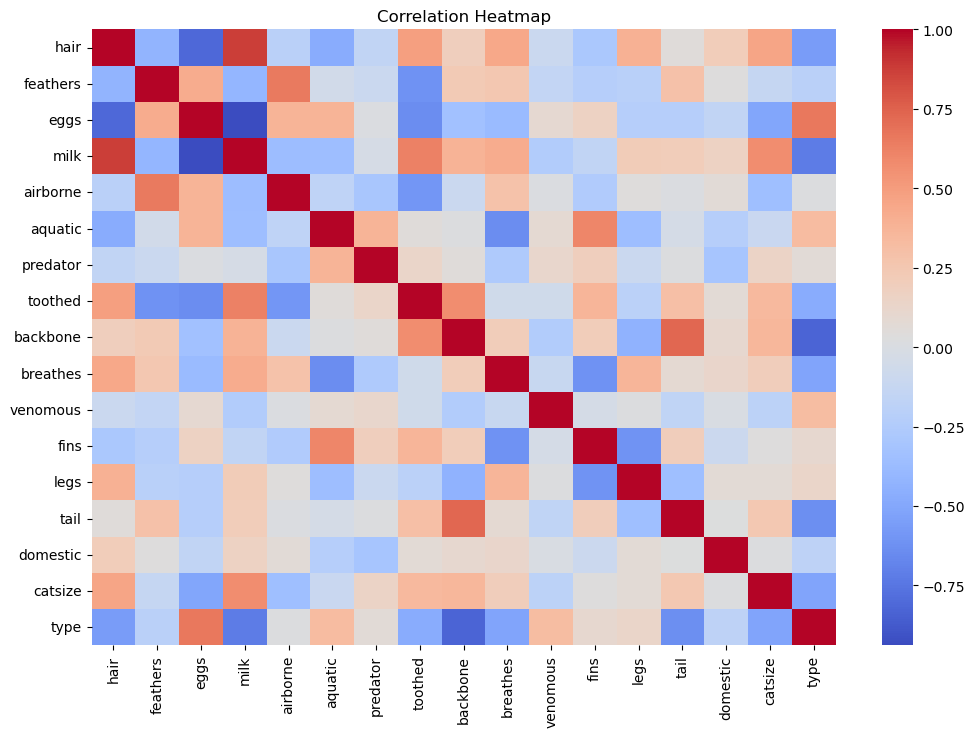

In [3]:
# =========================
# 2. Data Analysis (EDA)
# =========================

plt.figure(figsize=(8,6))
sns.countplot(x="type", data=df, palette="viridis")
plt.title("Distribution of Animal Types")
plt.show()

# Correlation Heatmap (only numeric columns)
numeric_df = df.drop(columns=['animal name']) if 'animal name' in df.columns else df
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# =========================
# 3. Data Preprocessing
# =========================

# Drop 'animal name' safely (string column not useful for classification)
if 'animal name' in df.columns:
    df = df.drop(columns=['animal name'])

# Handle missing values (numeric only)
df = df.apply(lambda col: col.fillna(col.median()) if col.dtype != 'O' else col)

# Features & Target
X = df.drop(columns=['type'])
y = df['type']

# Train-test split (80%-20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features for KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (80, 16)
Testing set shape: (21, 16)


In [23]:
# =========================
# 4. Implement KNN
# =========================
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with Euclidean distance, single core
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, n_jobs=1)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

print("✅ KNN Model Training Completed")


✅ KNN Model Training Completed


Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



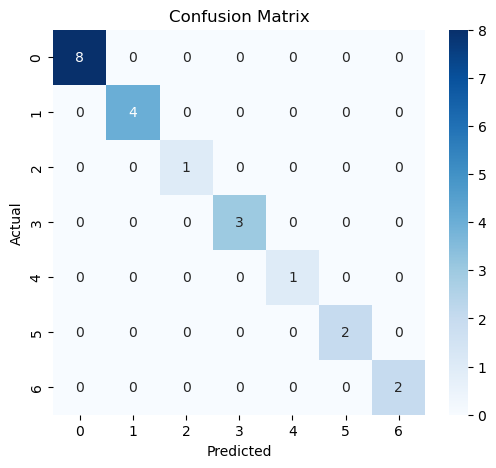

In [25]:
# =========================
# 5. Evaluation Metrics
# =========================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Other metrics
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


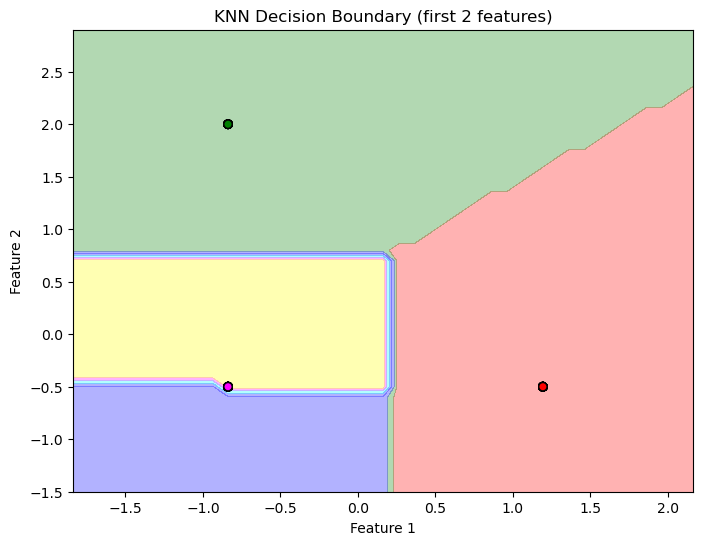

In [19]:
# =========================
# 6. Decision Boundary Visualization
# =========================
# Reduce to 2D using first 2 features for visualization only
X_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_train)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red','green','blue','cyan','magenta','yellow')))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(('red','green','blue','cyan','magenta','yellow')))
plt.title("KNN Decision Boundary (first 2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()